# Introduction to MaNGA

MaNGA is a 10,000 galaxy integral-field-spectroscopic survey that is part of the Sloan Digital Sky Surveys. In MaNGA, we use close-packed bundles of optical fibers to gather light from many different places in a galaxy and split it into a spectrum. Each spectrum tells us about what the stars and gas are doing in the corresponding region of the galaxy.

![MaNGA cartoon](http://www.sdss.org/wp-content/uploads/2014/07/manga_v3.jpg)

We are going to play around with a MaNGA datacubes and analyzed products today. Please download the following files:

* The MPL-5 drpall file: https://data.sdss.org/sas/mangawork/manga/spectro/redux/MPL-5/drpall-v2_0_1.fits
* The reduced datacube for galaxy 8455-3701: https://data.sdss.org/sas/mangawork/manga/spectro/redux/MPL-5/8455/stack/manga-8455-3701-LOGCUBE.fits.gz
* The analyzed "MAPS" file for the same galaxy: https://data.sdss.org/sas/mangawork/manga/spectro/analysis/MPL-5/SPX-GAU-MILESHC/8455/3701/manga-8455-3701-MAPS-SPX-GAU-MILESHC.fits.gz
* The analyzed "LOGCUBE" file for the same galaxy: https://data.sdss.org/sas/mangawork/manga/spectro/analysis/MPL-5/SPX-GAU-MILESHC/8455/3701/manga-8455-3701-LOGCUBE-SPX-GAU-MILESHC.fits.gz

When prompted for a password, use what is on the board (do not email this to anyone!)

**Important:** the data used here are proprietary and not public. Please do not distribute beyond this class!

Next, place them in the same folder that you're working in currently, so that they're easily accessible.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import table as t
from astropy import wcs

# Working with a `Table`

First, we'll read in the drpall (pronounced "D-R-P-all") file, which tells us about each galaxy that has been observed. We'll use a special astropy construct called a `Table`, which is like a fancy `numpy` `array`.

Astropy tables can read directly from FITS files (which are special binary files used to efficiently store data). They are basically a list of images, with some metadata in headers. Columns are accessed by strings in square brackets, and rows by integers in square brackets.

MaNGA galaxies are gneerally referred to by the plate number and IFU (fiber bundle) number used to observe them. We can add an index to our table based on the table column called `'plateifu'`, and then call an index using `.loc[]` (note the use of square brackets here).

In [2]:
drpall = t.Table.read('drpall-v2_0_1.fits')
drpall.add_index('plateifu')

drpall.loc['8455-3701']

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,zmin,zmax,szmin,szmax,ezmin,ezmax,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,str21,str11,str11,str8,str8,str8,str8,str8,str14,str12,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,str35,int64,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,str19,int64,str19,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,str6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8455,3701,8455-3701,1-274519,v2_0_1,v2_0_1,v1_3_1,v5_5_25,v2_2,APOGEE-2&MaNGA,MaNGA dither,157.179457248,39.8388849686,180.392438997,57.9101101171,157.17946,39.838885,0.0125375,9,8100.89,0,31.9961,46.3313,ma035,23,1,8953,156.42908,40.496143,1.01047,1.05678,1.17583,1.31071,1.71339,2.05307,0.598275,0.616465,0.628272,57399,57399,57399,2.73243,2.70262,2.68057,2.66015,4288,0,0,1,plateTargets-1.par,6931,J102843.06+395019.8,37,37,0,0.0219725,0.0287568,0.0429377,0.047206,0.0219406,0.0296078,126,3647,5,v1_0_1,290432,-999,0.0292897,0.0293203,-16.8853 .. -20.3359,-17.098 .. -20.1972,87.0774 .. 1041.09,9155320000.0,6628810000.0,0.752186,175.702,0.103926 .. 0.0185412,3.9388,3.48407,69.4359 .. 1526.45,0.0224772 .. 0.0089647,78.9454 .. 1511.1,0.0191364 .. 0.00852895,0.662618,1.78091,3.13007,3.76698,65.09 .. 1707.12,0.02783 .. 0.0242876


What if we want to know the distribution of masses and redshifts (distances) of all MaNGA galaxies? Let's plot those two against one another...

But wait, how do we know what they're called? We can use the `.colnames` attribute, which returns a list of strings.

In [3]:
print(drpall.colnames)

['plate', 'ifudsgn', 'plateifu', 'mangaid', 'versdrp2', 'versdrp3', 'verscore', 'versutil', 'versprim', 'platetyp', 'srvymode', 'objra', 'objdec', 'ifuglon', 'ifuglat', 'ifura', 'ifudec', 'ebvgal', 'nexp', 'exptime', 'drp3qual', 'bluesn2', 'redsn2', 'harname', 'frlplug', 'cartid', 'designid', 'cenra', 'cendec', 'airmsmin', 'airmsmed', 'airmsmax', 'seemin', 'seemed', 'seemax', 'transmin', 'transmed', 'transmax', 'mjdmin', 'mjdmed', 'mjdmax', 'gfwhm', 'rfwhm', 'ifwhm', 'zfwhm', 'mngtarg1', 'mngtarg2', 'mngtarg3', 'catidnum', 'plttarg', 'manga_tileid', 'nsa_iauname', 'ifudesignsize', 'ifutargetsize', 'ifudesignwrongsize', 'zmin', 'zmax', 'szmin', 'szmax', 'ezmin', 'ezmax', 'nsa_field', 'nsa_run', 'nsa_camcol', 'nsa_version', 'nsa_nsaid', 'nsa_nsaid_v1b', 'nsa_z', 'nsa_zdist', 'nsa_sersic_absmag', 'nsa_elpetro_absmag', 'nsa_elpetro_amivar', 'nsa_sersic_mass', 'nsa_elpetro_mass', 'nsa_elpetro_ba', 'nsa_elpetro_phi', 'nsa_extinction', 'nsa_elpetro_th50_r', 'nsa_petro_th50', 'nsa_petro_flux',

/usr/data/minhas/zpace/miniconda3/envs/astro320/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/usr/data/minhas/zpace/miniconda3/envs/astro320/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


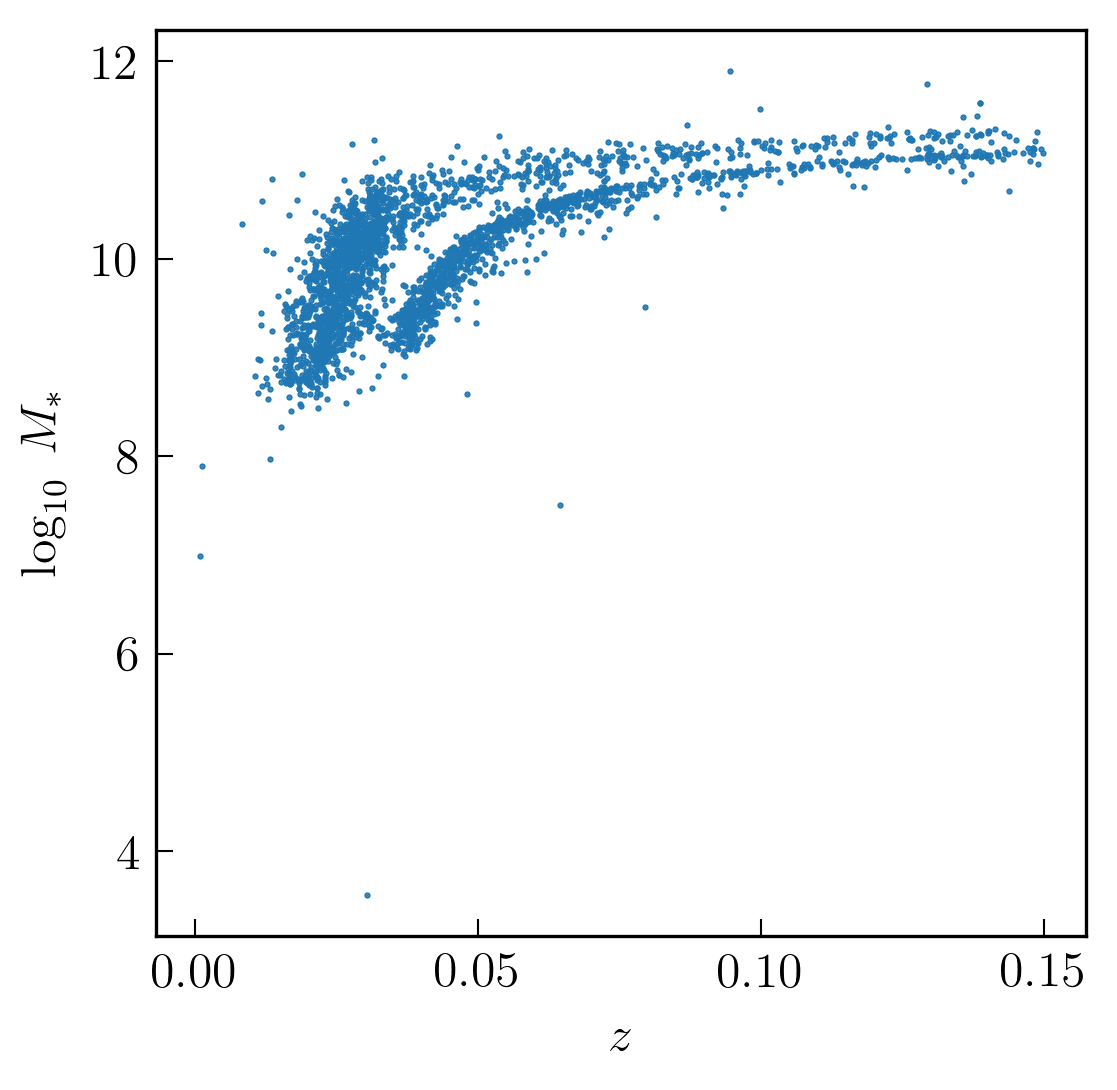

In [4]:
fig = plt.figure(figsize=(4, 4), dpi=300)
ax = fig.add_subplot(111)
ax.scatter(drpall['nsa_zdist'], np.log10(drpall['nsa_elpetro_mass']), s=0.25)
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$\log_{10} ~ M_*$')
plt.show()

# Reading FITS images & datacubes

FITS (Flexible Image Transport System) is a file format defined by NASA to work with astronomical data. Each FITS file contains a list of header-data pairs (a little like key-value pairs in `dict`s)

## Reduced Data Products

Let's start by reading in the reduced spectra. `fits.open(...)` actually returns a `HDUList` object, which acts a little like a regular `list`, but has some extra properties. We'll now expose the list of header-data-units (HDUs) using the `info()` method.

In [5]:
drp_logcube = fits.open('manga-8455-3701-LOGCUBE.fits.gz')
drp_logcube.info()

Filename: manga-8455-3701-LOGCUBE.fits.gz
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      74   ()      
  1  FLUX        ImageHDU        99   (44, 44, 4563)   float32   
  2  IVAR        ImageHDU        17   (44, 44, 4563)   float32   
  3  MASK        ImageHDU        17   (44, 44, 4563)   int32   
  4  WAVE        ImageHDU         9   (4563,)   float64   
  5  SPECRES     ImageHDU         9   (4563,)   float64   
  6  SPECRESD    ImageHDU         9   (4563,)   float64   
  7  OBSINFO     BinTableHDU    144   9R x 63C   [25A, 17A, 5A, J, I, 8A, E, E, E, E, E, E, J, J, I, J, E, 12A, J, 8A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 13A, E, E, E, E, D, D, D, D, E, E, J, J, J, E, E, E, E, J, J, E, E, E, E]   
  8  GIMG        ImageHDU        28   (44, 44)   float32   
  9  RIMG        ImageHDU        28   (44, 44)   float32   
 10  IIMG        ImageHDU        28   (44, 44)   float32   
 11  ZIMG        ImageHDU        28   (44, 44) 

Every FITS file has at least one HDU, and the first one will always be a binary table, called `'Primary'`. That HDU usually contains general information about how the data were obtained. You can always access individual HDUs by zero-indexed numbers in square brackets, but if there's something in a HDU's 'Name' field (which mirrors the `'EXTNAME'` field in the HDU's header), then you can use that.

Each HDU has two main attributes, `.header` (which acts like a dictionary) and `.data` (which acts like a numpy array).

In [6]:
print(drp_logcube['FLUX'].data.shape)
print(list(drp_logcube['FLUX'].header.keys()))

(4563, 44, 44)
['XTENSION', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'PCOUNT', 'GCOUNT', 'AUTHOR', 'VERSDRP2', 'VERSDRP3', 'VERSPLDS', 'VERSFLAT', 'VERSCORE', 'VERSPRIM', 'VERSUTIL', 'VERSIDL', 'BSCALE', 'BZERO', 'BUNIT', 'MASKNAME', 'TELESCOP', 'INSTRUME', 'SRVYMODE', 'PLATETYP', 'OBJSYS', 'EQUINOX', 'RADESYS', 'LAMPLIST', 'NEXP', 'EXPTIME', 'BLUESN2', 'REDSN2', 'AIRMSMIN', 'AIRMSMED', 'AIRMSMAX', 'SEEMIN', 'SEEMED', 'SEEMAX', 'TRANSMIN', 'TRANSMED', 'TRANSMAX', 'MJDMIN', 'MJDMED', 'MJDMAX', 'DATE-OBS', 'MJDRED', 'DATERED', 'MNGTARG1', 'MNGTARG2', 'MNGTARG3', 'IFURA', 'IFUDEC', 'OBJRA', 'OBJDEC', 'CENRA', 'CENDEC', 'PLATEID', 'DESIGNID', 'IFUDSGN', 'FRLPLUG', 'PLATEIFU', 'CARTID', 'HARNAME', 'METFILE', 'MANGAID', 'CATIDNUM', 'PLTTARG', 'DRP3QUAL', 'IFUGLON', 'IFUGLAT', 'EBVGAL', 'GFWHM', 'RFWHM', 'IFWHM', 'ZFWHM', 'CTYPE3', 'CRPIX3', 'CRVAL3', 'CD3_3', 'CUNIT3', 'CRPIX1', 'CRPIX2', 'CRVAL1', 'CRVAL2', 'CD1_1', 'CD2_2', 'CTYPE1', 'CTYPE2', 'CUNIT1', 'CUNIT2', 'HDUCLASS', 'HDUCL

We can see that the flux datacube is 4563 by 44 by 44.

We can also see which header keywords are used. Most are pretty useless for us, but those like `'CRVAL'`, `'CDELT'`, `'NAXIS'`, `'CRPIX'`, `'CD'`, and `'CROT'` define a coordinate system for the cube (which maps pixels to locations on the sky and individual wavelengths). We will use this coordinate information in the future.

For now, let's plot the central spectrum for this galaxy...

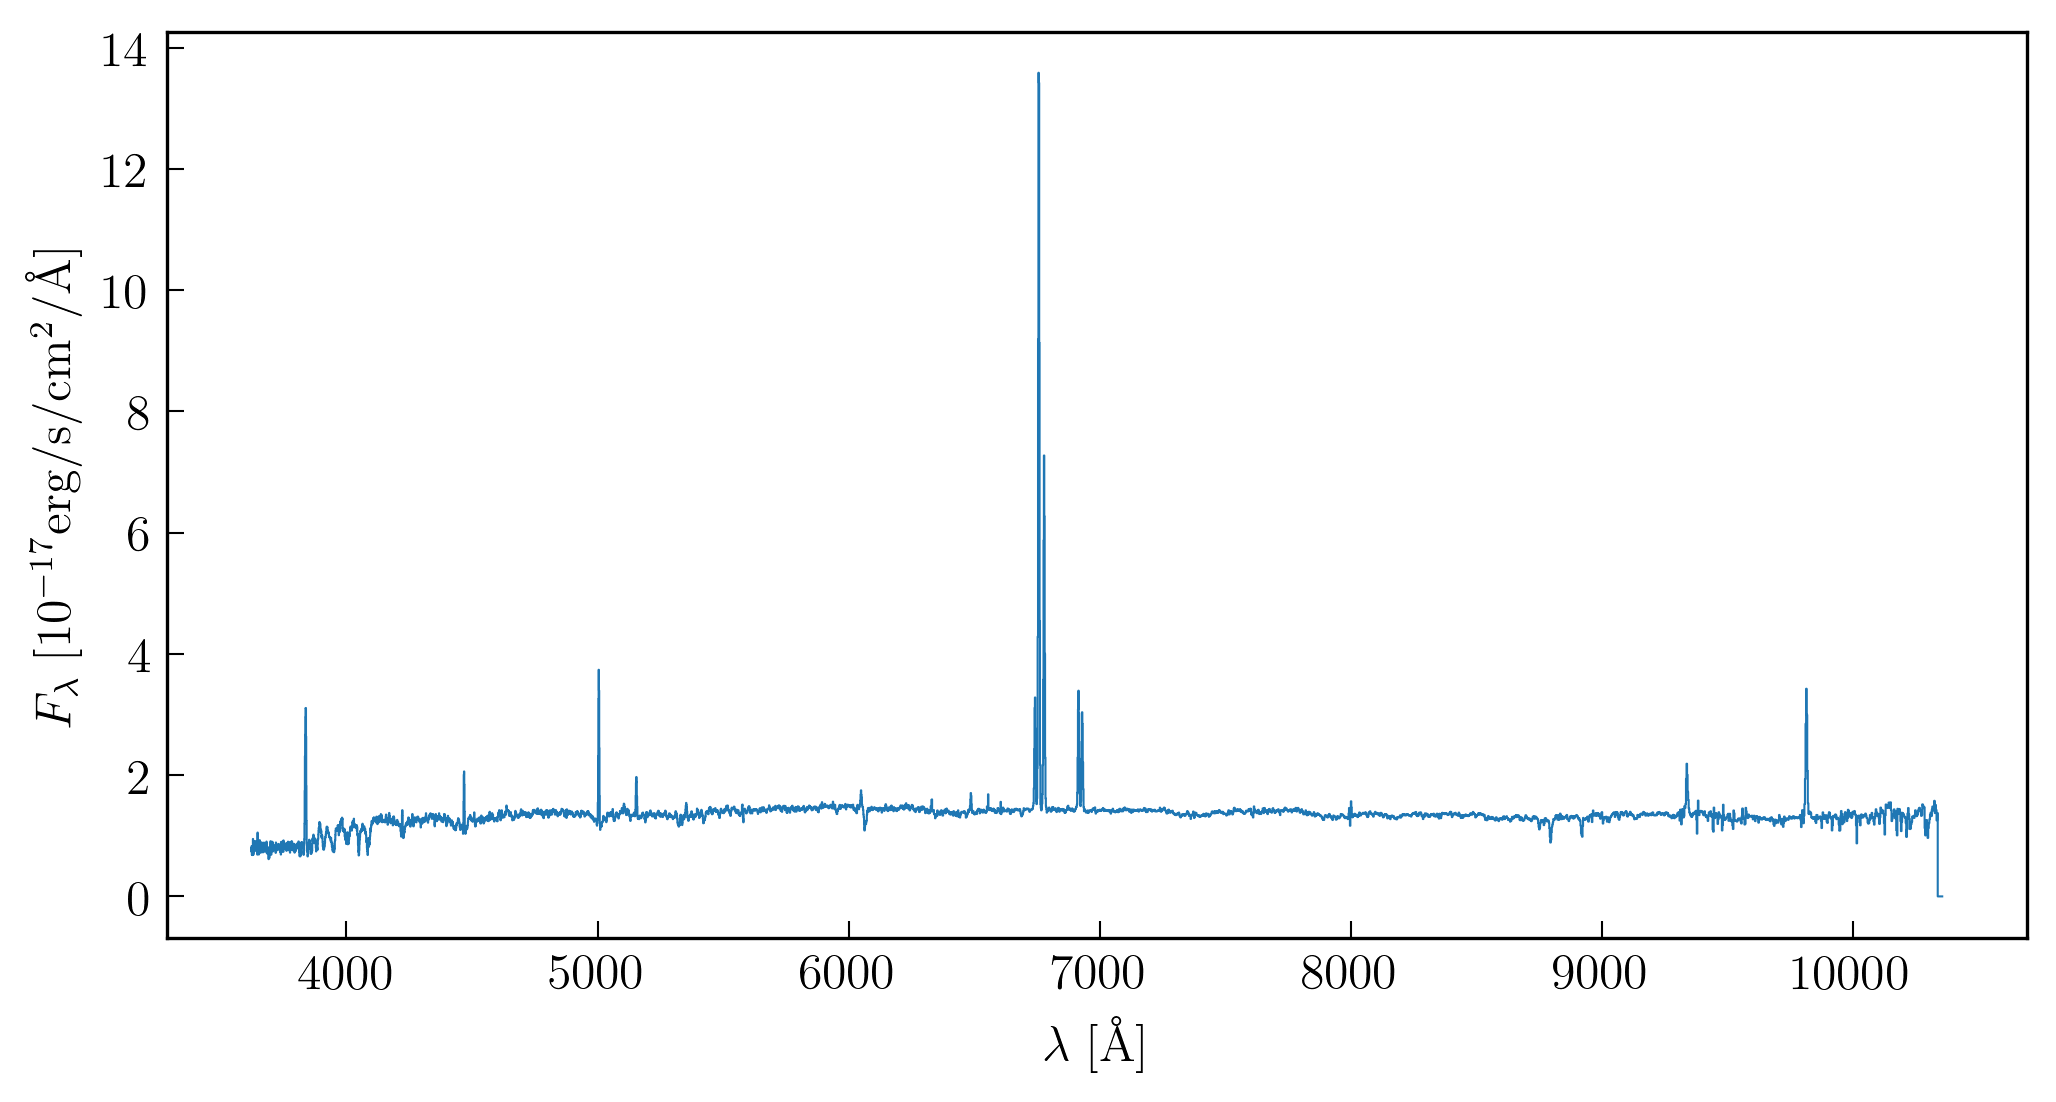

In [7]:
NL, NY, NX = drp_logcube['FLUX'].data.shape # unpack shape tuple
X_ctr, Y_ctr = NX // 2, NY // 2

plt.figure(figsize=(8, 4), dpi=300)
plt.plot(drp_logcube['WAVE'].data, drp_logcube['FLUX'].data[:, X_ctr, Y_ctr], drawstyle='steps-mid', linewidth=0.5)
plt.xlabel(r'$\lambda ~ [{\rm\AA}]$')
plt.ylabel(r'$F_{\lambda} ~ [10^{-17} {\rm erg/s/cm^2/\AA}]$')
plt.show()

## Analyzed Data Products: Spectra

Let's continue by plotting the contribution to the light received from the stars (which gives the smooth continuum) and the emission lines (the sharp peaks, from hot gas). The emission lines seen here are similar in principle to the HI lines that you'll see in radio surveys.

We can load the DAP LOGCUBE file similar to the DRP LOGCUBE, and access the appropriate extensions.

In [8]:
dap_logcube = fits.open('manga-8455-3701-LOGCUBE-SPX-GAU-MILESHC.fits.gz')
dap_logcube.info()

Filename: manga-8455-3701-LOGCUBE-SPX-GAU-MILESHC.fits.gz
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     117   ()      
  1  FLUX        ImageHDU        44   (44, 44, 4563)   float64   
  2  IVAR        ImageHDU        45   (44, 44, 4563)   float64   
  3  MASK        ImageHDU        44   (44, 44, 4563)   int16   
  4  WAVE        ImageHDU         9   (4563,)   float64   
  5  REDCORR     ImageHDU         9   (4563,)   float64   
  6  MODEL       ImageHDU        43   (44, 44, 4563)   float64   
  7  EMLINE      ImageHDU        43   (44, 44, 4563)   float64   
  8  EMLINE_BASE  ImageHDU        43   (44, 44, 4563)   float64   
  9  EMLINE_MASK  ImageHDU        43   (44, 44, 4563)   int16   


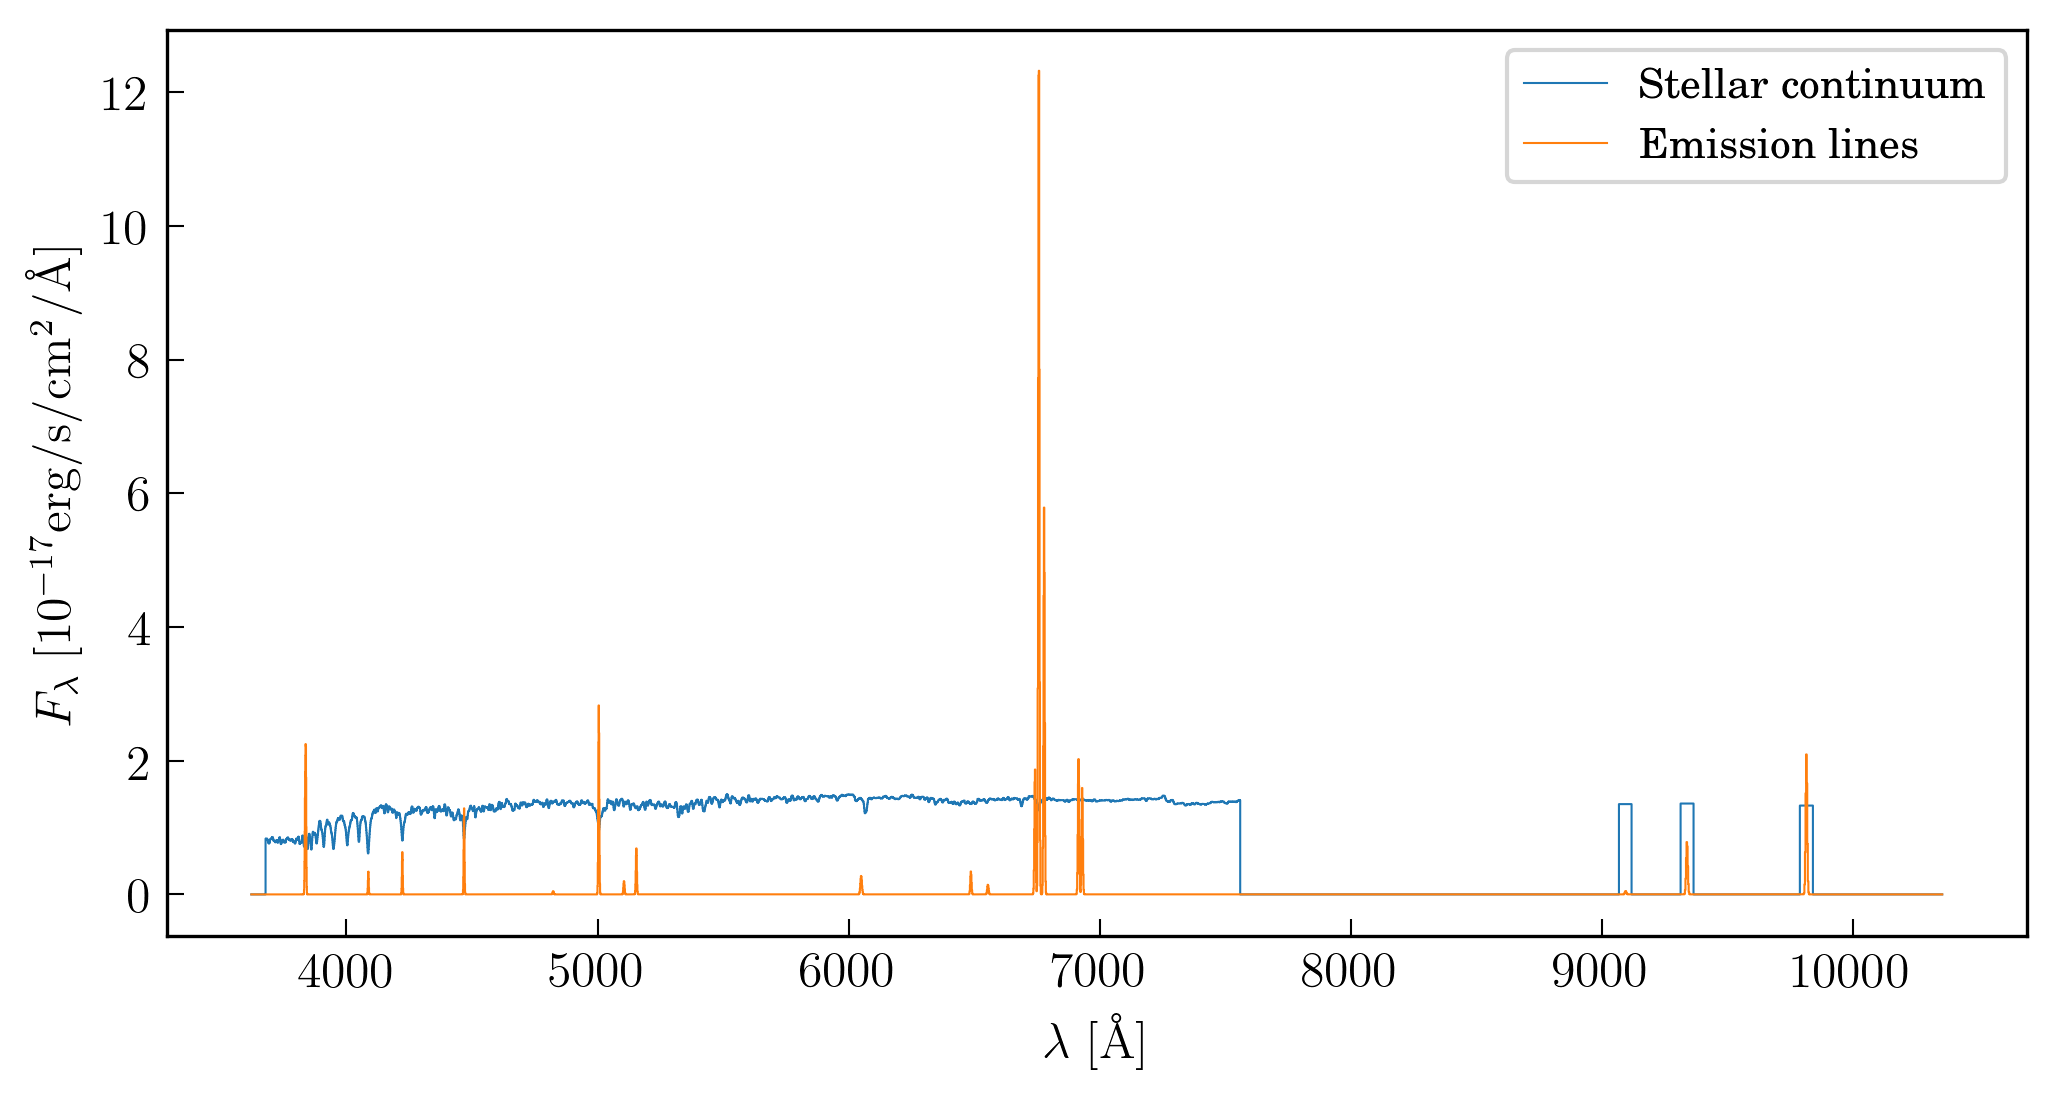

In [9]:
plt.figure(figsize=(8, 4), dpi=300)
continuum =  dap_logcube['MODEL'].data - dap_logcube['EMLINE'].data
plt.plot(dap_logcube['WAVE'].data, continuum[:, X_ctr, Y_ctr],
         drawstyle='steps-mid', linewidth=0.5, label='Stellar continuum')
plt.plot(dap_logcube['WAVE'].data, dap_logcube['EMLINE'].data[:, X_ctr, Y_ctr],
         drawstyle='steps-mid', linewidth=0.5, label='Emission lines')
plt.xlabel(r'$\lambda ~ [{\rm\AA}]$')
plt.ylabel(r'$F_{\lambda} ~ [10^{-17} {\rm erg/s/cm^2/\AA}]$')
plt.legend(loc='best')
plt.show()

There are sections where the fitted stellar continuum goes to zero. That's because the stellar models don't extend to wavelengths redder than about 7500 Angstroms. Don't be alarmed!

## Analyzed Data Products: Emission-Line Maps

Finally, let's take a look at the DAP MAPS files, which give things like emission line intensities, which can be used to compute useful quantities like star formation rate (SFR) and metallicity ($12 + \log{\frac{O}{H}}$).

In [10]:
dap_maps = fits.open('manga-8455-3701-MAPS-SPX-GAU-MILESHC.fits.gz')
dap_maps.info()

Filename: manga-8455-3701-MAPS-SPX-GAU-MILESHC.fits.gz
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     123   ()      
  1  SPX_SKYCOO  ImageHDU        43   (44, 44, 2)   float64   
  2  SPX_ELLCOO  ImageHDU        45   (44, 44, 2)   float64   
  3  SPX_MFLUX   ImageHDU        36   (44, 44)   float64   
  4  SPX_MFLUX_IVAR  ImageHDU        37   (44, 44)   float64   
  5  SPX_SNR     ImageHDU        34   (44, 44)   float64   
  6  BINID       ImageHDU        34   (44, 44)   int64   
  7  BIN_LWSKYCOO  ImageHDU        43   (44, 44, 2)   float64   
  8  BIN_LWELLCOO  ImageHDU        47   (44, 44, 2)   float64   
  9  BIN_AREA    ImageHDU        35   (44, 44)   float64   
 10  BIN_FAREA   ImageHDU        34   (44, 44)   float64   
 11  BIN_MFLUX   ImageHDU        37   (44, 44)   float64   
 12  BIN_MFLUX_IVAR  ImageHDU        38   (44, 44)   float64   
 13  BIN_MFLUX_MASK  ImageHDU        37   (44, 44)   int32   
 14  BIN_SNR     ImageHDU        34 

This is **a lot to process**. If we are interested in emission-line intensity, then we should be looking for the `'EMLINE_GFLUX'` extension.

In [11]:
dap_maps['EMLINE_GFLUX'].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   44                                                  
NAXIS2  =                   44                                                  
NAXIS3  =                   21                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    3 / Number of coordinate axes                      
CRPIX1  =                 23.0 / Pixel coordinate of reference point            
CRPIX2  =                 23.0 / Pixel coordinate of reference point            
CRPIX3  =                  1.0 / Pixel coordinate of reference point            
PC1_1   =         -0.0001388

The channel-maps (`'C01'` through `'C21'`---which means axis-zero indices 0 through 20) refer to the intensity of individual emission lines. Let's look at Hydrogen-$\alpha$, the n=3 to n=2 transition of hydrogen recombination.

Let's also set up a mask that suppresses any values where the detection is not at the 3-$\sigma$ level.

In [12]:
Ha = dap_maps['EMLINE_GFLUX'].data[7, ...]
Ha_ivar = dap_maps['EMLINE_GFLUX_IVAR'].data[7, ...]
Ha_mask = (Ha * np.sqrt(Ha_ivar) < 3.)
Ha_masked = np.ma.array(Ha, mask=Ha_mask)

Now let's make a fancy figure. We'll need to use `astropy`'s world coordinate system (WCS) package to design for ourselves a figure with the proper axes limits and labels.

In [13]:
maps_wcs = wcs.WCS(dap_maps['EMLINE_GFLUX'].header, naxis=(1, 2))
print(maps_wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 157.17946000000001  39.838884999999998  
CRPIX : 23.0  23.0  
PC1_1 PC1_2  : -0.000138889  0.0  
PC2_1 PC2_2  : 0.0  0.000138889  
CDELT : 1.0  1.0  
NAXIS : 44  44  21


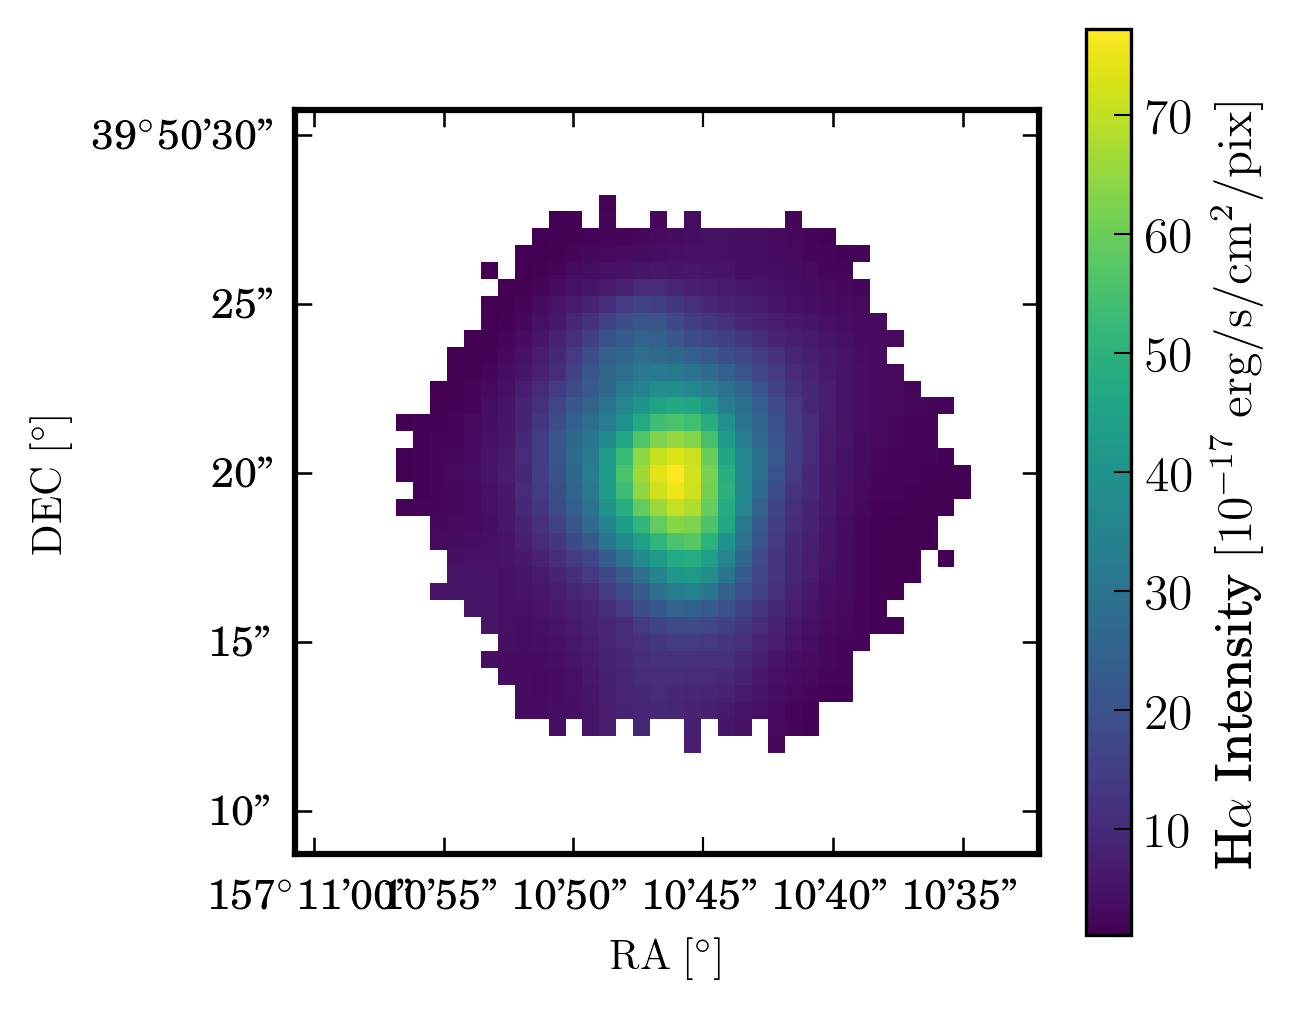

In [14]:
fig = plt.figure(figsize=(4, 5), dpi=300)
ax = plt.subplot(projection=maps_wcs)
im = ax.imshow(Ha_masked)
cb = plt.colorbar(im, shrink=0.8)
cb.set_label(r'H$\alpha$ Intensity $[10^{-17} ~ {\rm erg/s/cm^2/pix}]$')
ax.set_xlabel(r'${\rm RA} ~ [^{\circ}]$')
ax.set_ylabel(r'${\rm DEC} ~ [^{\circ}]$')
plt.show()

## Analyzed Data Products: BPT diagrams

BPT diagrams (named for Baldwin, Phillips and Terlevich) show the ratios of emission lines, in order to diagnose the excitation mechanism of emission lines. One popular combination of ratios is $NII/H\alpha$ vs $OIII/H\beta$.

Let's figure out a way to plot ratios of those equivalent widths, while masking bad data.

In [15]:
def get_line_ew(maps, key, sn=3.):
    sew_hdu = maps['EMLINE_SEW']
    sew_ivar_hdu = maps['EMLINE_SEW']
    
    # get a mapping from eline key to channel key
    v2k = {v: k for (k, v) in sew_hdu.header.items()}
    # get a mapping from channel key to channel
    cstring2ix = lambda s: int(s[1:]) - 1
    
    ix = cstring2ix(v2k[key])
    
    ew = sew_hdu.data[ix, ...]
    ew_ivar = sew_ivar_hdu.data[ix, ...]
    snr = ew * np.sqrt(ew_ivar)
    ew_mask = (snr < sn)
    
    return np.ma.array(ew, mask=ew_mask)    

/usr/data/minhas/zpace/miniconda3/envs/astro320/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10
/usr/data/minhas/zpace/miniconda3/envs/astro320/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10


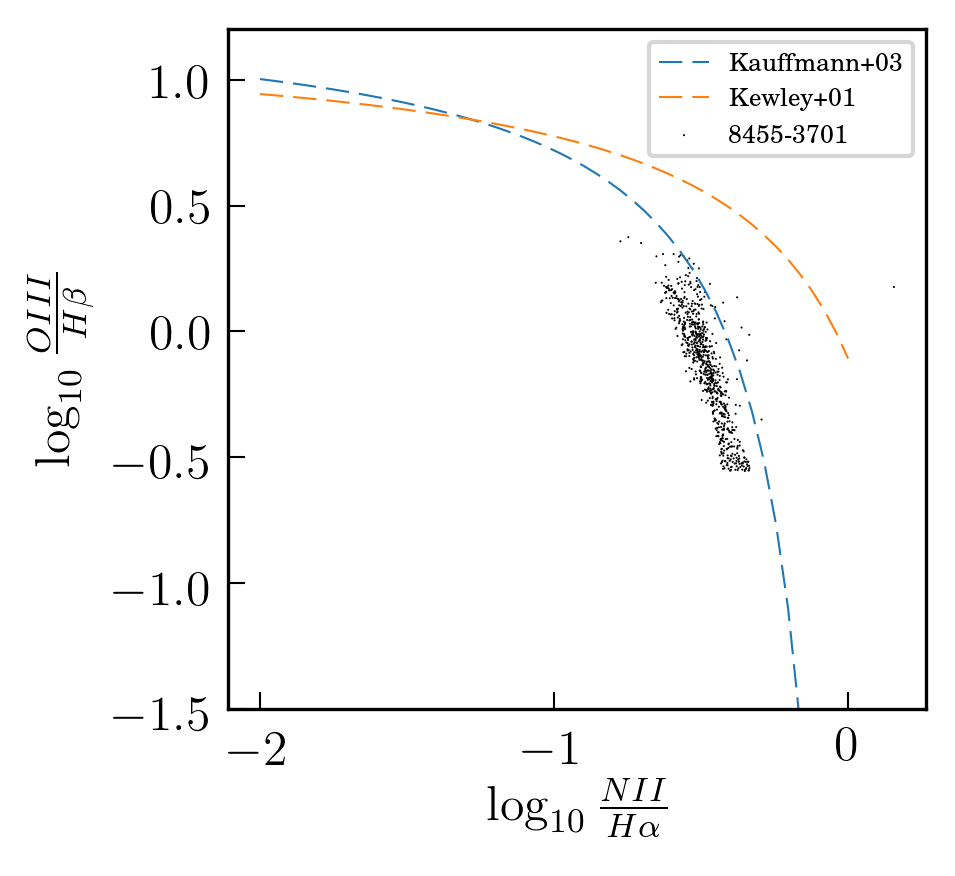

In [16]:
ew_N2_6584 = get_line_ew(dap_maps, 'NII-6585', 3.)
ew_Ha = get_line_ew(dap_maps, 'Ha-6564', 3.)
ew_O3_5007 = get_line_ew(dap_maps, 'OIII-5008', 3.)
ew_Hb = get_line_ew(dap_maps, 'Hb-4862', 3.)

N2Ha = np.log10(ew_N2_6584 / ew_Ha)
O3Hb = np.log10(ew_O3_5007 / ew_Hb)

fig = plt.figure(figsize=(3, 3), dpi=300)
ax = fig.add_subplot(111)
ax.scatter(N2Ha.flatten(), O3Hb.flatten(), label=drp_logcube['FLUX'].header['PLATEIFU'],
           s=0.25, c='k', edgecolor='None')
ax.set_xlabel(r'$\log_{10}{\frac{NII}{H\alpha}}$')
ax.set_ylabel(r'$\log_{10}{\frac{OIII}{H\beta}}$')

Ka03 = lambda x: (0.61 / (x - .05)) + 1.3
Ke01 = lambda x: (0.61 / (x - .47)) + 1.19

xgrid = np.linspace(-2., 0., 50)
ax.plot(xgrid, Ka03(xgrid), linestyle='--', label='Kauffmann+03', linewidth=.5)
ax.plot(xgrid, Ke01(xgrid), linestyle='--', label='Kewley+01', linewidth=.5)
ax.set_ylim([-1.5, 1.2])
plt.legend(prop={'size': 6})

plt.show()

# Final notes on MaNGA data access

* If you want to access MaNGA data regularly, please talk to Matt Bershady, Christy Tremonti, or me (Zach Pace)
* Consider using `marvin`, a toolset that automates the boring bits of data access. Talk to me for more details.